In [115]:
from PIL import Image
import glob

print("Success imort PIL lib")

def resize_images(img_path):
    images=glob.glob

Success imort PIL lib


In [116]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [117]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!


In [118]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("rock 이미지 resize 완료!")

300  images to be resized.
300  images resized.
rock 이미지 resize 완료!


In [119]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("paper 이미지 resize 완료!")

300  images to be resized.
300  images resized.
paper 이미지 resize 완료!


In [120]:
import numpy as np

def load_data(img_path, number_of_data=900, rock_path='/rock/*.jpg', scissor_path='/scissor/*.jpg', paper_path='/paper/*.jpg'):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+scissor_path):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+rock_path):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+paper_path):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print(np.max(x_train_norm), np.min(x_train_norm))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
0.9647058823529412 0.0
y_train shape: (900,)


라벨:  0


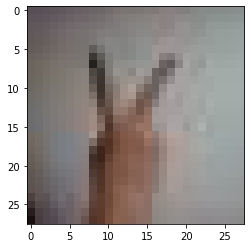

In [121]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기

In [122]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [123]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_25 (Dense)             (None, 3)               

In [124]:

print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
#print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
#x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
#print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))


Before Reshape - x_train_norm shape: (900, 28, 28, 3)
After Reshape - x_train_reshaped shape: (900, 28, 28, 3)


In [125]:

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)


Epoch 1/10
29/29 [==============================] - 0s 3ms/step - loss: 1.0745 - accuracy: 0.4522
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9549 - accuracy: 0.7122
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7530 - accuracy: 0.7244
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.8300
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8944
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.9389
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2000 - accuracy: 0.9544
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1682 - accuracy: 0.9556
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1282 - accuracy: 0.9756
Epoch 10/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9778


In [126]:
# test data 만들어주기

# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_rock"
resize_images(image_dir_path)
print("test_rock 이미지 resize 완료!", end='\n\n')

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_scissor"
resize_images(image_dir_path)
print("test_scissor 이미지 resize 완료!", end='\n\n')

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test_paper"
resize_images(image_dir_path)
print("test_paper 이미지 resize 완료!", end='\n\n')


100  images to be resized.
100  images resized.
test_rock 이미지 resize 완료!

100  images to be resized.
100  images resized.
test_scissor 이미지 resize 완료!

100  images to be resized.
100  images resized.
test_paper 이미지 resize 완료!



In [127]:
def load_test_data(img_path, number_of_data=300, rock_path='/test_rock/*.jpg',\
                   scissor_path='/test_scissor/*.jpg', paper_path='/test_paper/*.jpg'):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+scissor_path):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+rock_path):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+paper_path):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
print(image_dir_path)
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

/aiffel/aiffel/rock_scissor_paper
학습데이터(x_test)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [128]:

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


In [129]:

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))


10/10 - 0s - loss: 0.3234 - accuracy: 0.8533
test_loss: 0.32340726256370544 
test_accuracy: 0.8533333539962769


TEST ACCURACY가 높아서 적어놓습니다.<br>
처음 사용한 학습 데이터 : https://wannabe-professional-programmer.tistory.com/43


저는 학습 데이터를 다음과 같은 제한 조건을 주고 준비했습니다.

- 배경 : 흰 배경에서 주변에 다른 물체가 보이지 않도록 최대한 노력
- 포즈 : 손을 밑에서 위로 뻗는 형식
- 의상 : 머리끈이나 의상이 보이지 않고 손만 보이도록 

제한 조건을 준 이유는 다음과 같습니다.

1. 현재 AI에서 분석하는 데이터는 일정한 환경이나 제한조건이 존재한다고 생각하기 때문입니다.

의료영상 중, mri의 경우 어떤 부위를 촬영할 때 어느 사람이나 동일한 포즈로 mri를 찍습니다. 어느 병원은 컬러로 찍고, 흑백으로 찍는게 아닌, 전부 흑백(흑백이라고 표현하는게 맞는진 모르겠으나)으로 데이터가 나옵니다.

의료영상 중 수술 영상의 경우, 발 수술하는데 복부 개복하지 않는것 처럼, 어느 부위를 수술할 때 개복하는 위치나, 초소형 카메라가 들어가는 위치의 범위는 대체로 유사합니다. 또한, 유사한 수술기법이기 때문에, 수술영상에서 보이는 장기나, 사용하는 수술 기구 또한 변하지 않으며 추측컨데 조도 또한 유사할 것입니다.(어둡게 수술하지않을테니까요)

자율주행에서도, 블랙박스영상이나 라이다가 차 내에 고정이 되어있지 해당 센서가 모든곳에서 움직이진 않습니다. 즉, 고정된 위치에서 한정된 데이터를 읽어와 분석합니다.

위와 같은 생각으로 저는, 가위바위보에도 제한조건이 필요하다고 생각했습니다. 가위바위보는 보통 서서하지, 뛰면서 하지 않습니다. 그렇기 때문에 배경은 고정일 것이므로 배경에 대한 노이즈를 최대한 줄일 흰색 배경에서 데이터를 생성하였습니다.

가위바위보는 밑에서 위로 내거나 아래에서 위로내는 등, 내는 방법은 다양하지만, 결국 가위나 바위, 보를 냈을 결과에 대한 포즈는 동일합니다. 이 테스트는 영상이 아니라 사진을 분석하는 것이며, 이미 낸 상황에 데이터를 분석하는 것입니다. 즉, 손의 위치가 오른쪽에서 나오거나 왼쪽에서 나오거나 둘 중하나이며 카메라가 고정되어있을 상황에서 위쪽에서 가위바위보를 냈거나 아랫쪽에서 가위바위보를 낸 상황은 없을것입니다. 그렇기 때문에 저는 아래쪽에서 위쪽으로 낸 상황을 설정하여 학습시켰습니다.
~~뜬금없이 왜 아래쪽에서 위쪽이냐 라고하시면, 오른쪽 왼쪽 데이터를 각각 생성하는게 귀찮았으며(죄송합니다) 컴퓨터가 가위, 바위, 보를 구별하기만 하면 됐지 내가 이상한 데이터를 준걸 모를거기 때문입니다.(컴퓨터왕무시 ㅎ_ㅎㅋ)~~

마지막으로 의상의 경우는 카메라가 의상이라거나 그런 노이즈에 의해서 오판을 하는것이 아니라 사람마다 다른 손의 크기나 피부색, 카메라와의 거리, 손에 힘을 준 정도 등에 따라 다르게 판단하면 안된다라고 생각했습니다. 그래서 손의 모양과 색깔에만 집중될 수 있도록 손만 나오게 데이터를 생성하면서 다양한 각도로 데이터를 생성하였습니다.

2. 첫 Test Accuracy가 너무 낮으면 그것은 학습이 된것이 아니라고 생각합니다.

너무 낮은경우 딥러닝 모델의 문제가 아니라 데이터 자체에 문제가 있다고 생각합니다. 적어도 정확도가 80%는 넘어야한다고 생각하였습니다. 그러려면 더더욱 제한조건이 필요하다고 생각하였습니다.



# 성능 개선 방향 1. 학습 데이터의 픽셀을 높여본다.

- 기존의 학습데이터는 224*224 이미지 크기에서 28*28 로 줄여지므로 이미 작은 픽셀로 데이터를 생성하여 해상도를 높이면 학습 accuracy가 더 높아질것으로 예상하였습니다. 

In [130]:
# 96*96 이미지로 학습데이터 생성

# 1. resize images

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_train_rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!\n\n")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_train_scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!\n\n")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_train_paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!\n\n")


150  images to be resized.
150  images resized.
바위 이미지 resize 완료!


150  images to be resized.
150  images resized.
가위 이미지 resize 완료!


150  images to be resized.
150  images resized.
보 이미지 resize 완료!




In [131]:
# 2. load images
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_better_train, y_better_train)=load_data(image_dir_path, number_of_data=450,rock_path='/better_train_rock/*.jpg',\
                             paper_path='/better_train_paper/*.jpg', scissor_path='/better_train_scissor/*.jpg')
x_better_train_norm = x_better_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_better_train shape: {}".format(x_better_train.shape))
print(np.max(x_better_train_norm), np.min(x_better_train_norm))
print("y_better_train shape: {}".format(y_better_train.shape))

학습데이터(x_train)의 이미지 개수는 450 입니다.
x_better_train shape: (450, 28, 28, 3)
0.9176470588235294 0.03137254901960784
y_better_train shape: (450,)


In [132]:
# 3. normalization
print("Before Reshape - x_better_train_norm shape: {}".format(x_better_train_norm.shape))

x_better_train_reshaped=x_better_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_better_train_norm shape: {}".format(x_better_train_reshaped.shape))

Before Reshape - x_better_train_norm shape: (450, 28, 28, 3)
After Reshape - x_better_train_norm shape: (450, 28, 28, 3)


In [133]:
# 4. new train
better_model=keras.models.Sequential()
better_model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
better_model.add(keras.layers.MaxPool2D(2,2))
better_model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
better_model.add(keras.layers.MaxPooling2D((2,2)))
better_model.add(keras.layers.Flatten())
better_model.add(keras.layers.Dense(32, activation='relu'))
better_model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(better_model.layers))

better_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

better_model.fit(x_better_train_reshaped, y_better_train, epochs=10)

Model에 추가된 Layer 개수:  7
Epoch 1/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0881 - accuracy: 0.4689
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0368 - accuracy: 0.5511
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.9606 - accuracy: 0.7067
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8391 - accuracy: 0.7533
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.8067
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.5346 - accuracy: 0.8133
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4088 - accuracy: 0.8600
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8867
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2532 - accuracy: 0.9133
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.

In [134]:
# 96*96 이미지로 테스트데이터 생성

# resize test images

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_test_rock"
resize_images(image_dir_path)
print("better_test_rock 이미지 resize 완료!", end='\n\n')

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_test_scissor"
resize_images(image_dir_path)
print("better_test_scissor 이미지 resize 완료!", end='\n\n')

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_test_paper"
resize_images(image_dir_path)
print("better_test_paper 이미지 resize 완료!", end='\n\n')

100  images to be resized.
100  images resized.
better_test_rock 이미지 resize 완료!

100  images to be resized.
100  images resized.
better_test_scissor 이미지 resize 완료!

100  images to be resized.
100  images resized.
better_test_paper 이미지 resize 완료!



In [135]:
# 2. load test images

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
print(image_dir_path)
(x_better_test, y_better_test)=load_test_data(image_dir_path, 300,\
                                              '/better_test_rock/*.jpg','/better_test_rock/*.jpg','/better_test_rock/*.jpg' )
x_better_test_norm = x_better_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_better_test_norm shape: {}".format(x_better_test_norm.shape))
print("y_better_test shape: {}".format(y_better_test.shape))

/aiffel/aiffel/rock_scissor_paper
학습데이터(x_test)의 이미지 개수는 300 입니다.
x_better_test_norm shape: (300, 28, 28, 3)
y_better_test shape: (300,)


In [136]:
# 3. normalization

print("Before Reshape - x_better_test_norm shape: {}".format(x_better_test_norm.shape))
x_better_test_reshaped=x_better_test_norm.reshape( -1, 28, 28, 3)
print("After Reshape - x_better_test_reshaped shape: {}".format(x_better_test_reshaped.shape))

Before Reshape - x_better_test_norm shape: (300, 28, 28, 3)
After Reshape - x_better_test_reshaped shape: (300, 28, 28, 3)


In [137]:
# 4. test

better_test_loss, better_test_accuracy = better_model.evaluate(x_better_test_reshaped,y_better_test, verbose=2)
print("better_test_loss: {} ".format(better_test_loss))
print("better_test_accuracy: {}".format(better_test_accuracy))

10/10 - 0s - loss: 2.7094 - accuracy: 0.3333
better_test_loss: 2.709434986114502 
better_test_accuracy: 0.3333333432674408


처참하게 망했네요! ^_^/  ~~(인생.....)~~

기존의 데이터는 학습데이터가 300씩 900장이고, 테스트데이터는 100씩 300장이었다면,<br>
현재 데이터는 학습데이터가 150씩 450장이고, 테스트 데이터는 100씩 300장이었습니다.

혹시 학습이 부족한가 싶어, 똑같은 조건으로 다시 시도해보았습니다.

In [138]:
# 96*96 이미지로 학습데이터 생성

# 1. resize images

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/bb_train_rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!\n\n")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/bb_train_scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!\n\n")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/bb_train_paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!\n\n")

# 2. load images
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_bb_train, y_bb_train)=load_data(image_dir_path, number_of_data=900,rock_path='/bb_train_rock/*.jpg',\
                             paper_path='/bb_train_paper/*.jpg', scissor_path='/bb_train_scissor/*.jpg')
x_bb_train_norm = x_bb_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_bb_train shape: {}".format(x_bb_train.shape))
print(np.max(x_bb_train_norm), np.min(x_bb_train_norm))
print("y_bb_train shape: {}".format(y_bb_train.shape))

# 3. normalization
print("Before Reshape - x_bb_train_norm shape: {}".format(x_bb_train_norm.shape))

x_bb_train_reshaped=x_bb_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_bb_train_norm shape: {}".format(x_bb_train_reshaped.shape))

# 4. new train
better_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

better_model.fit(x_bb_train_reshaped, y_bb_train, epochs=10)

300  images to be resized.
300  images resized.
바위 이미지 resize 완료!


300  images to be resized.
300  images resized.
가위 이미지 resize 완료!


300  images to be resized.
300  images resized.
보 이미지 resize 완료!


학습데이터(x_train)의 이미지 개수는 900 입니다.
x_bb_train shape: (900, 28, 28, 3)
0.8431372549019608 0.0196078431372549
y_bb_train shape: (900,)
Before Reshape - x_bb_train_norm shape: (900, 28, 28, 3)
After Reshape - x_bb_train_norm shape: (900, 28, 28, 3)
Epoch 1/10
29/29 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.9089
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9711
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.9878
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9967
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9978
Epoch 6/10
29/29 [==============================] - 0s 3ms/step

In [139]:
# 96*96 이미지로 테스트데이터 생성

# resize test images

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_test_rock"
resize_images(image_dir_path)
print("better_test_rock 이미지 resize 완료!", end='\n\n')

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_test_scissor"
resize_images(image_dir_path)
print("better_test_scissor 이미지 resize 완료!", end='\n\n')

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/better_test_paper"
resize_images(image_dir_path)
print("better_test_paper 이미지 resize 완료!", end='\n\n')

# 2. load test images

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
print(image_dir_path)
(x_better_test, y_better_test)=load_test_data(image_dir_path, 300,\
                                              '/better_test_rock/*.jpg','/better_test_rock/*.jpg','/better_test_rock/*.jpg' )
x_better_test_norm = x_better_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_better_test_norm shape: {}".format(x_better_test_norm.shape))
print("y_better_test shape: {}".format(y_better_test.shape))

# 3. normalization

print("Before Reshape - x_better_test_norm shape: {}".format(x_better_test_norm.shape))
x_better_test_reshaped=x_better_test_norm.reshape( -1, 28, 28, 3)
print("After Reshape - x_better_test_reshaped shape: {}".format(x_better_test_reshaped.shape))

# 4. test

better_test_loss, better_test_accuracy = better_model.evaluate(x_better_test_reshaped,y_better_test, verbose=2)
print("better_test_loss: {} ".format(better_test_loss))
print("better_test_accuracy: {}".format(better_test_accuracy))

100  images to be resized.
100  images resized.
better_test_rock 이미지 resize 완료!

100  images to be resized.
100  images resized.
better_test_scissor 이미지 resize 완료!

100  images to be resized.
100  images resized.
better_test_paper 이미지 resize 완료!

/aiffel/aiffel/rock_scissor_paper
학습데이터(x_test)의 이미지 개수는 300 입니다.
x_better_test_norm shape: (300, 28, 28, 3)
y_better_test shape: (300,)
Before Reshape - x_better_test_norm shape: (300, 28, 28, 3)
After Reshape - x_better_test_reshaped shape: (300, 28, 28, 3)
10/10 - 0s - loss: 4.3265 - accuracy: 0.3333
better_test_loss: 4.326506614685059 
better_test_accuracy: 0.3333333432674408


# 결론

처음 생각으론 사진의 축소를 정도가 덜하면 해상도가 좋아지니, 모델의 성능이 좋아질거라 예상했다.
하지만 결과는 처참하게 성능이 떨어졌다.~~망했다.~~

결과가 나온 것을 찬찬히 살펴보니, 이미 기존에 train할때 epoch당 accuracy가 너무 높았다. 오버피팅이 되었다 라고 판단하는게 맞는진 모르겠으나, 오버피팅이 되었다라고,, 판단하는게 맞는것 같다. 맞는진 후에, 아이펠 사람들에게 물어볼 예정.

학습 데이터와 테스트 데이터를 찬찬히 살펴보니, 움직이면서 픽셀의 유동화? 잔상이 많았다. 이미지의 축소가 조금만 이뤄지면서 이 잔상까지 학습이 된게 실패요인 이라고 생각한다. CNN에서 모델층을 지나가면서 이미지가 작아지는 것이 이미지의 지역적 특징 요소를 학습할 수 있는 효과가 있다고 배웠다. 큰 이미지를 축소하면, 잔상과 같은 노이즈들이 무시되어 이미지의 형태가 학습이 되지만, 아마 작은 이미지는 축소되는 양이 한정적이라, 잔상에 대한 학습도 진행되어 성능이 망했다고 생각한다.

# 성능 개선 방향 2. 하이퍼 파라미터 변경 / model 수정

- 성능 개선 방향 1에서, 96\*96 이미지는 처참히 망했기 때문에, 224\*224 이미지 데이터로 학습과 테스트를 진행하려한다.
이 아이디어에서는 모델의 구조를 변경해보거나, 하이퍼파라미터를 변경하여 성능개선을 해보려 한다.


In [152]:
# 224*224 이미지로 학습

# 1. resize images 이미 되어있으므로 skip

# 2. load images
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_new_train, y_new_train)=load_data(image_dir_path)
x_new_train_norm = x_new_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_new_train shape: {}".format(x_new_train.shape))
print(np.max(x_new_train_norm), np.min(x_new_train_norm))
print("y_new_train shape: {}".format(y_new_train.shape))

# 3. normalization
print("Before Reshape - x_new_train_norm shape: {}".format(x_new_train_norm.shape))

x_new_train_reshaped=x_new_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_new_train_norm shape: {}".format(x_new_train_reshaped.shape))

# 4. new train
new_model=keras.models.Sequential()
new_model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
new_model.add(keras.layers.MaxPool2D(2,2))
new_model.add(tf.keras.layers.Dropout(0.3))
new_model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
new_model.add(keras.layers.MaxPooling2D((2,2)))
new_model.add(tf.keras.layers.Dropout(0.3))
new_model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
new_model.add(keras.layers.MaxPooling2D((2,2)))
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(32, activation='relu'))
new_model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(new_model.layers))

new_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

new_model.fit(x_new_train_reshaped, y_new_train, epochs=10)


학습데이터(x_train)의 이미지 개수는 900 입니다.
x_new_train shape: (900, 28, 28, 3)
0.9647058823529412 0.0
y_new_train shape: (900,)
Before Reshape - x_new_train_norm shape: (900, 28, 28, 3)
After Reshape - x_new_train_norm shape: (900, 28, 28, 3)
Model에 추가된 Layer 개수:  11
Epoch 1/10
29/29 [==============================] - 0s 4ms/step - loss: 1.1063 - accuracy: 0.3167
Epoch 2/10
29/29 [==============================] - 0s 4ms/step - loss: 1.0910 - accuracy: 0.3789
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 1.0768 - accuracy: 0.4556
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 1.0277 - accuracy: 0.4789
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9368 - accuracy: 0.5656
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7671 - accuracy: 0.7122
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.7756
Epoch 8/10
29/29 [==============================] - 0s 3

In [153]:
# 224*224 이미지로 테스트

# resize test images 이미 되어있으므로 skip

# 2. load test images

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_new_test, y_new_test)=load_test_data(image_dir_path)
x_new_test_norm = x_new_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_new_test_norm shape: {}".format(x_new_test_norm.shape))
print("y_new_test shape: {}\n\n".format(y_new_test.shape))

# 3. normalization

print("Before Reshape - x_new_test_norm shape: {}".format(x_new_test_norm.shape))
x_new_test_reshaped=x_new_test_norm.reshape( -1, 28, 28, 3)
print("After Reshape - x_new_test_reshaped shape: {}\n\n".format(x_new_test_reshaped.shape))

# 4. test

new_test_loss, new_test_accuracy = new_model.evaluate(x_new_test_reshaped,y_new_test, verbose=2)
print("new_test_loss: {} ".format(new_test_loss))
print("new_test_accuracy: {}".format(new_test_accuracy))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_new_test_norm shape: (300, 28, 28, 3)
y_new_test shape: (300,)


Before Reshape - x_new_test_norm shape: (300, 28, 28, 3)
After Reshape - x_new_test_reshaped shape: (300, 28, 28, 3)


10/10 - 0s - loss: 0.2004 - accuracy: 0.9867
new_test_loss: 0.20038697123527527 
new_test_accuracy: 0.9866666793823242


# 결론

예전에 개인적으로 resnet 논문을 읽어본 적이 있었고~~이해했다곤 안했습니다.~~ dropout 기법이 매우 인상적이었습니다. 사람조차, 모든걸 기억하지 못하고 적절히 망각하는데, ai에도 적용하면 좋을 것같아, model사이에 dropout 층을 추가하였고, 혹시 최적화가 덜될까봐 conv2D층을 더 추가해주었습니다.

그 결과 test_accuracy가 85에서 98 정확도까지 올랐습니다.